In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

**UNDERSTANDING THE DATASET**

In [2]:
df=pd.read_csv("C:/311_Service_Requests_from_2010_to_Present.csv") #IMPORTED THE DATA

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape   #shape of the dataset

(364558, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
df.columns   #columns of the dataset 

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
df.isna().sum().sort_values(ascending=False) #column with null values

School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Location             364558
Garage Lot Name                   364558
Ferry Direction                   364557
Ferry Terminal Name               364556
Road Ramp                         364296
Bridge Highway Segment            364296
Bridge Highway Name               364261
Bridge Highway Direction          364261
Landmark                          364183
Intersection Street 2             314046
Intersection Street 1             313438
Cross Street 2                     57805
Cross Street 1                     57188
Street Name                        51699
Incident Address                   51699
Descriptor                          6501
X Coordinate (State Plane)          4030
Latitude                            4030
Longitude                           4030
Y Coordinate (State Plane)          4030
Location                            4030
Address Type    

<AxesSubplot:>

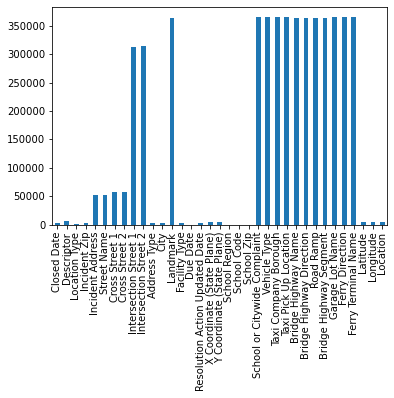

In [8]:
%matplotlib inline
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

**Missing value treatment**


In [9]:
df.dropna(subset=['Closed Date'], inplace=True)   #Remove the records whose Closed Date values are null


In [10]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [11]:
df['Closing_Time'] = df['Closed Date'] - df['Created Date']

In [12]:
df['Closing_Time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Closing_Time, Length: 362177, dtype: timedelta64[ns]

In [13]:
df[['Closing_Time','Created Date','Closed Date']]   # time elapsed in closed and creation date

,Closing_Time,Created Date,Closed Date
0,0 days 00:55:30,2015-12-31 23:59:45,2016-01-01 00:55:15
1,0 days 01:27:13,2015-12-31 23:59:44,2016-01-01 01:26:57
2,0 days 04:51:34,2015-12-31 23:59:29,2016-01-01 04:51:03
3,0 days 07:45:27,2015-12-31 23:57:46,2016-01-01 07:43:13
4,0 days 03:27:44,2015-12-31 23:56:58,2016-01-01 03:24:42
...,...,...,...
364553,0 days 10:17:47,2015-01-01 00:04:44,2015-01-01 10:22:31
364554,0 days 02:20:34,2015-01-01 00:04:28,2015-01-01 02:25:02
364555,0 days 00:19:03,2015-01-01 00:01:30,2015-01-01 00:20:33
364556,0 days 02:40:53,2015-01-01 00:01:29,2015-01-01 02:42:22


In [14]:
df['Closing_Time(seconds)'] = df['Closing_Time'].dt.total_seconds() #Converted the calculated date to seconds 

In [15]:
df[['Closing_Time(seconds)','Created Date','Closed Date']]

,Closing_Time(seconds),Created Date,Closed Date
0,3330.0,2015-12-31 23:59:45,2016-01-01 00:55:15
1,5233.0,2015-12-31 23:59:44,2016-01-01 01:26:57
2,17494.0,2015-12-31 23:59:29,2016-01-01 04:51:03
3,27927.0,2015-12-31 23:57:46,2016-01-01 07:43:13
4,12464.0,2015-12-31 23:56:58,2016-01-01 03:24:42
...,...,...,...
364553,37067.0,2015-01-01 00:04:44,2015-01-01 10:22:31
364554,8434.0,2015-01-01 00:04:28,2015-01-01 02:25:02
364555,1143.0,2015-01-01 00:01:30,2015-01-01 00:20:33
364556,9653.0,2015-01-01 00:01:29,2015-01-01 02:42:22


In [16]:
df['Closing_Time(seconds)'].describe() # descriptive statistics for the colsing time column

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Closing_Time(seconds), dtype: float64

In [17]:
df['Closing_Time(seconds)'][df['Closing_Time(seconds)']>0]

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Closing_Time(seconds), Length: 362177, dtype: float64

In [18]:
#number of null values in the Complaint_Type and City columns

In [19]:
df[['Complaint Type','City']].isna().sum()

Complaint Type      0
City              674
dtype: int64

In [20]:
df['City'].fillna('Unknown City',inplace=True)  #Imputed the NA value with Unknown City

In [54]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [21]:
df['City'].isna().sum()

0

In [22]:
#frequency plot for the complaints in each city


In [23]:
df1 = pd.crosstab(df['City'],df['Complaint Type'])
df1

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1971,0,22,17062,2402,66,206,15,275,...,90,548,9144,3556,20,18,0,427,54,433
BROOKLYN,0,3191,0,124,36445,6257,79,291,60,948,...,389,1575,13982,5965,49,58,0,1258,155,575
CAMBRIA HEIGHTS,0,15,0,0,177,148,0,0,0,6,...,2,0,29,100,0,0,0,7,0,0


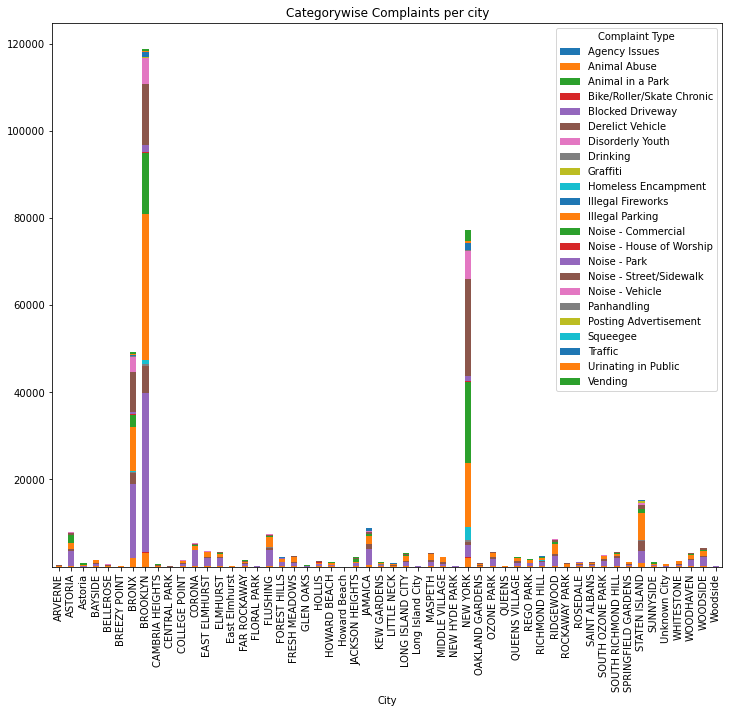

In [24]:
df1.plot(kind='bar',stacked=True,figsize=(12,10))
plt.title('Categorywise Complaints per city')
plt.show()                                   #frequency plot for the complaints in each city

In [25]:
df_brook=df[['Longitude','Latitude']].loc[(df.City == 'BROOKLYN')]
df_brook

,Longitude,Latitude
5,-73.992568,40.660823
9,-73.999539,40.623793
13,-73.874505,40.687511
17,-73.983430,40.679154
18,-73.930202,40.616550
...,...,...
364539,-73.984375,40.691248
364541,-73.956966,40.713613
364544,-73.974766,40.680352
364545,-73.904011,40.692384


(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

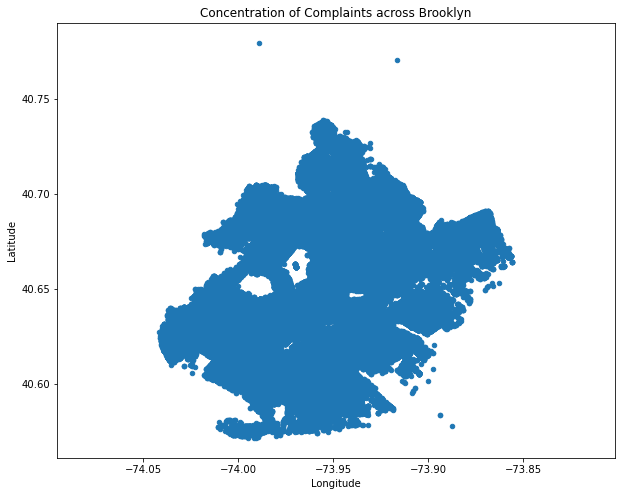

In [26]:
#scatter and hexbin plot of the concentration of complaints across Brooklyn
df_brook[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Concentration of Complaints across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

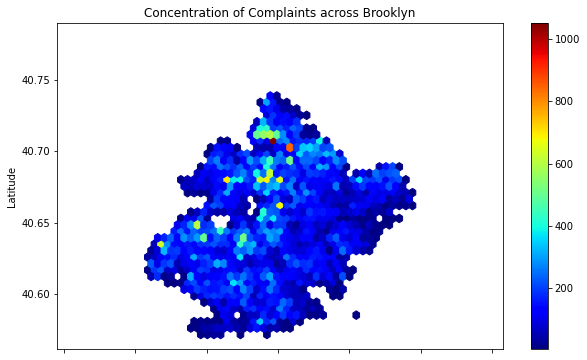

In [58]:
df_brook.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=2,title = 'Concentration of Complaints across Brooklyn', figsize=(10,6)).axis('equal')

In [28]:
 #bar graph to show the types of complaints

<AxesSubplot:title={'center':'Count vs Types of Complaints'}>

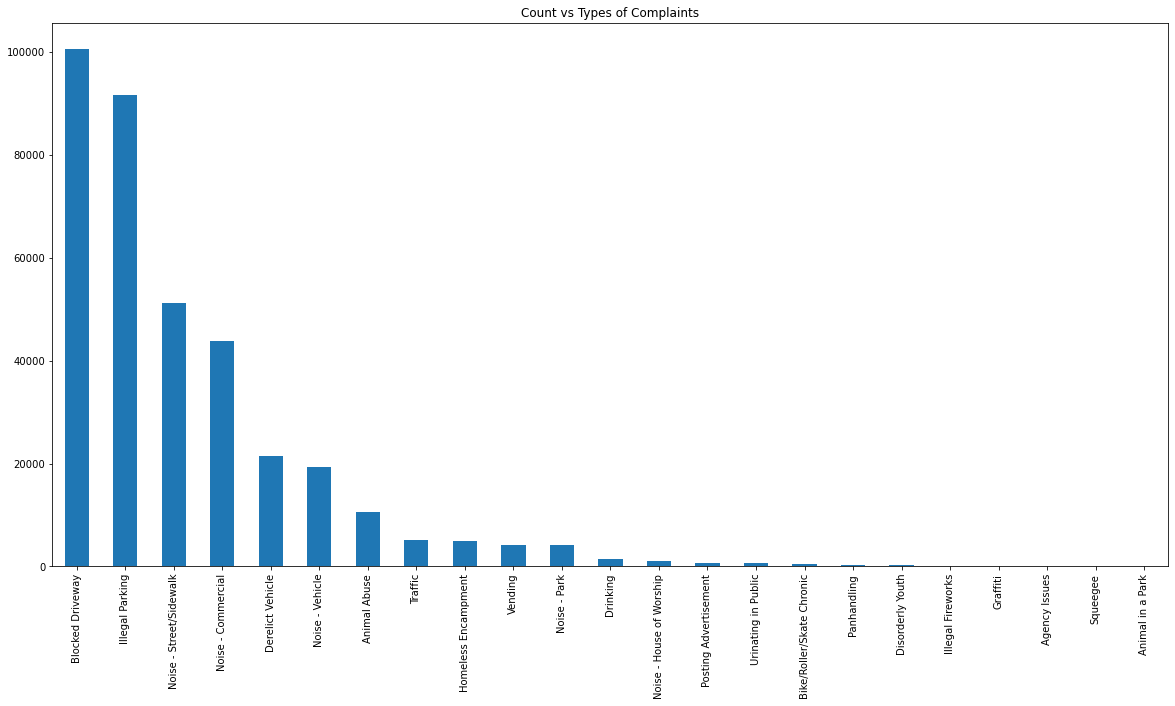

In [29]:
df['Complaint Type'].value_counts().plot(kind='bar',
                    figsize=(20,10), title = 'Count vs Types of Complaints')

In [30]:
df_ny=df['Complaint Type'].loc[(df.City == 'NEW YORK')]
df_ny

0          Noise - Street/Sidewalk
6                  Illegal Parking
19         Noise - Street/Sidewalk
23                 Illegal Parking
26        Noise - House of Worship
                    ...           
364542     Noise - Street/Sidewalk
364543     Noise - Street/Sidewalk
364547     Noise - Street/Sidewalk
364552     Noise - Street/Sidewalk
364555     Noise - Street/Sidewalk
Name: Complaint Type, Length: 77289, dtype: object

In [31]:
#frequency of various types of complaints for New York City

<AxesSubplot:title={'center':'Types of complaints for New York City'}>

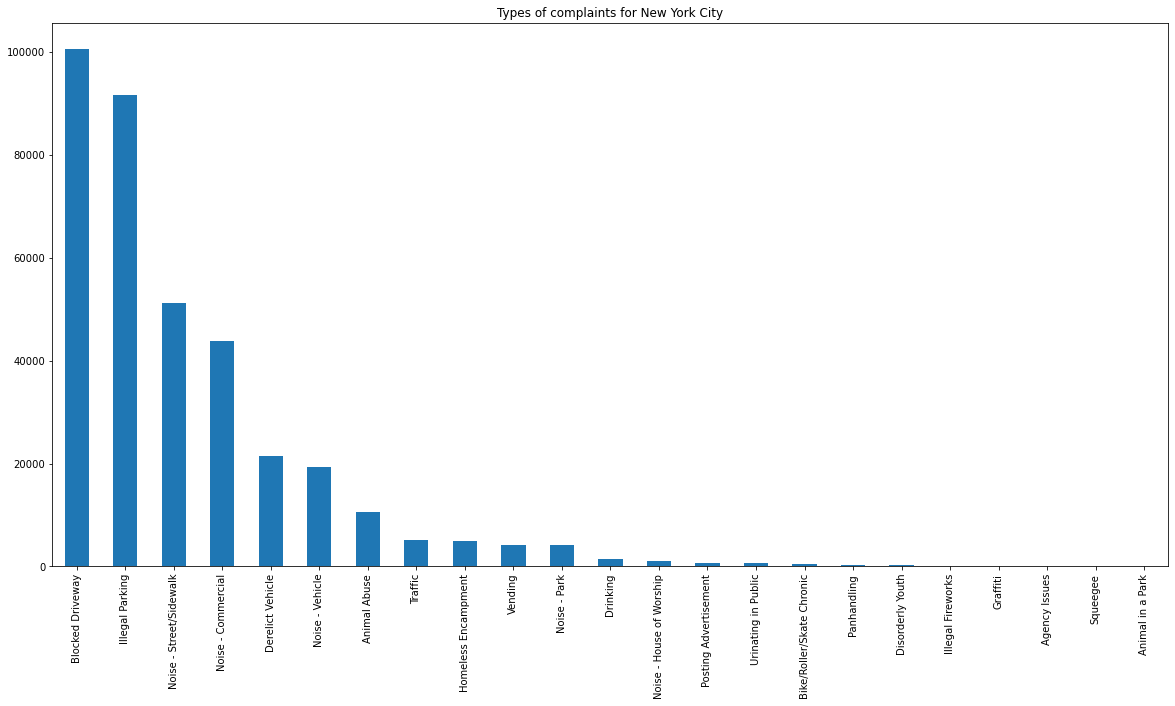

In [32]:
df['Complaint Type'].value_counts().plot(kind='bar',
                    figsize=(20,10), title ='Types of complaints for New York City')

In [33]:
#top 10 complaint types

In [34]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [35]:
#various types of complaints in each city

In [36]:
x=df['Complaint Type'].groupby(df['City'])
x=pd.DataFrame(x)

In [37]:
x.columns=['City','Complaint Type']
print(x.to_markdown())

|    | City                | Complaint Type                                      |
|---:|:--------------------|:----------------------------------------------------|
|  0 | ARVERNE             | 3927         Illegal Parking                        |
|    |                     | 5256      Noise - Commercial                        |
|    |                     | 7932            Animal Abuse                        |
|    |                     | 8260            Animal Abuse                        |
|    |                     | 8685         Illegal Parking                        |
|    |                     |                  ...                                |
|    |                     | 359186      Blocked Driveway                        |
|    |                     | 359600          Animal Abuse                        |
|    |                     | 361481      Derelict Vehicle                        |
|    |                     | 362250      Blocked Driveway                        |
|   

In [38]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [39]:
#DataFrame, df_new, which contains cities as columns and complaint types in rows

In [40]:
df_new = pd.crosstab(df['Complaint Type'],df['City'])
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,2,0,0,6,1,0,1,0,4,0


In [41]:
#chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints


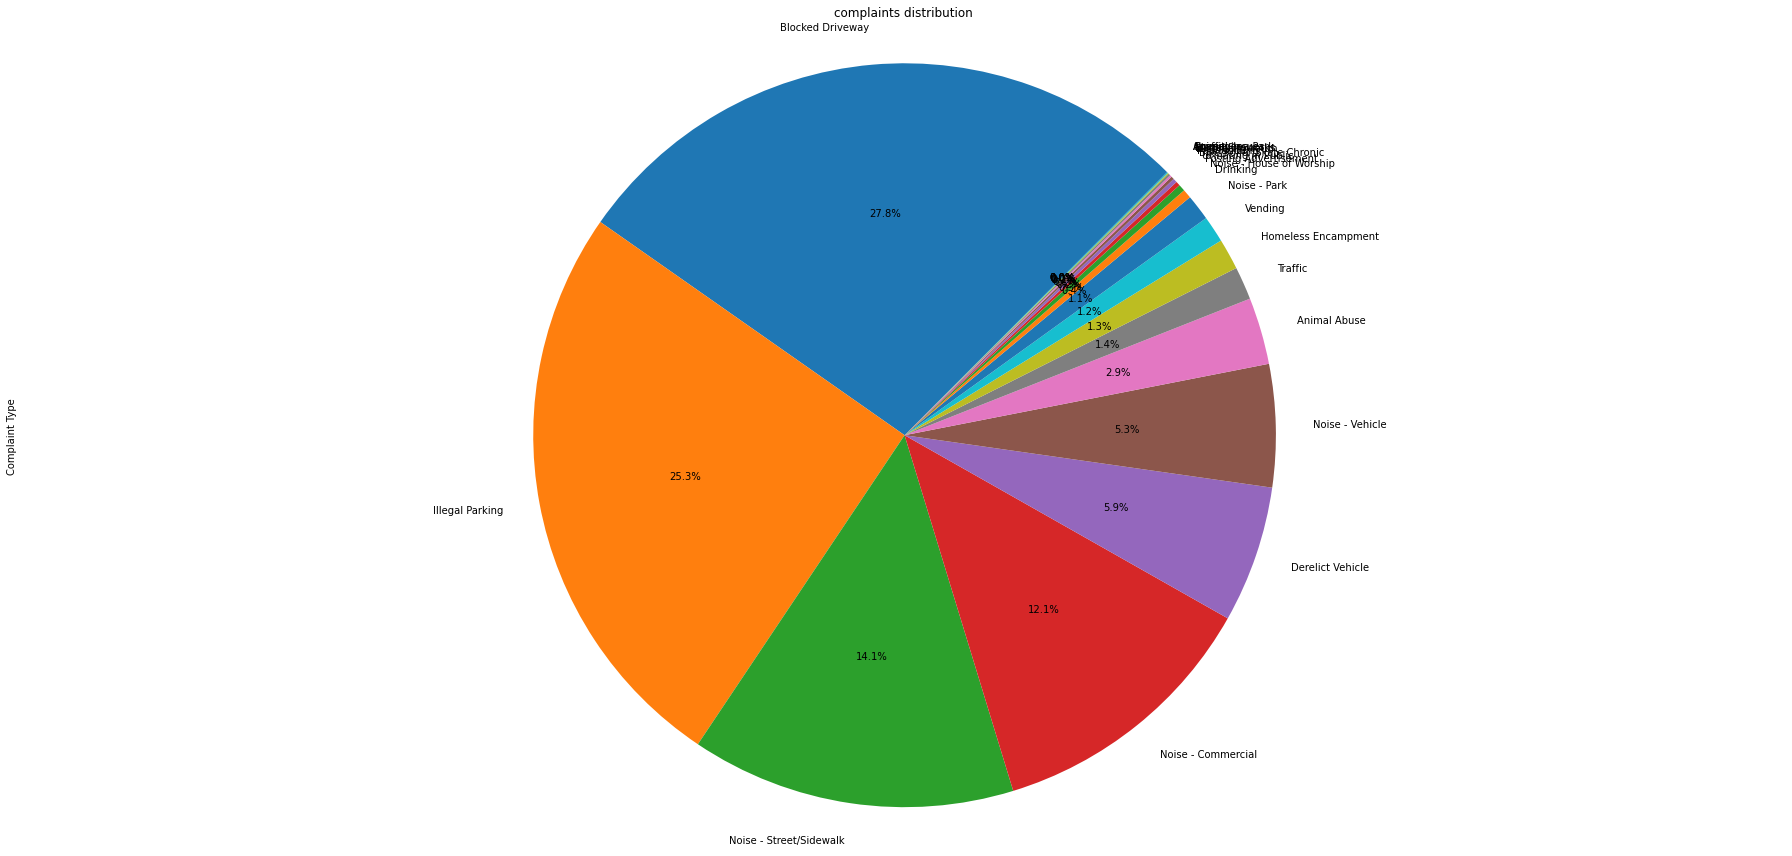

In [42]:
df['Complaint Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=45, shadow=False,figsize = (25,12))
plt.axis('equal')
plt.title('complaints distribution')
plt.tight_layout()
plt.show()

In [43]:
#complaint types based on the average Request_Closing_Time grouping them for different locations


In [44]:
df.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [45]:
df['Location'].unique()

array(['(40.86568153633767, -73.92350095571744)',
       '(40.775945312321085, -73.91509393898605)',
       '(40.870324522111424, -73.88852464418646)', ...,
       '(40.860067825505645, -73.85211211113571)',
       '(40.64643889447912, -73.98197140465561)',
       '(40.73884743426441, -73.86375174412073)'], dtype=object)

In [46]:
df_comp = df.groupby(['City','Complaint Type']).agg({'Closing_Time(seconds)':'mean'})
df_comp = df_comp.rename(columns={'Closing_Time(seconds)':'Avg Request_Closing_Time'})

In [47]:
pd.set_option('display.max_rows',None)
print(df_comp)

                                               Avg Request_Closing_Time
City                Complaint Type                                     
ARVERNE             Animal Abuse                           8.399196e+03
                    Blocked Driveway                       8.318840e+03
                    Derelict Vehicle                       1.139400e+04
                    Disorderly Youth                       1.292850e+04
                    Drinking                               8.590000e+02
                    Graffiti                               5.508000e+03
                    Homeless Encampment                    6.541250e+03
                    Illegal Parking                        8.406081e+03
                    Noise - Commercial                     8.234000e+03
                    Noise - House of Worship               6.653429e+03
                    Noise - Park                           4.638000e+03
                    Noise - Street/Sidewalk                7.173

In [48]:
#Visualize the average of Request_Closing_Time

In [90]:
df_ct = df.groupby(['Complaint Type']).agg({'Closing_Time(seconds)':'mean'})
df_ct = pd.DataFrame(df_ct)
df_ct=df_ct.sort_values(['Closing_Time(seconds)']).reset_index()
df_ct

,Complaint Type,Closing_Time(seconds)
0,Posting Advertisement,7.286256e+03
1,Illegal Fireworks,1.011348e+04
2,Noise - Commercial,1.108576e+04
3,Noise - House of Worship,1.139109e+04
4,Noise - Park,1.222606e+04
5,Noise - Street/Sidewalk,1.223130e+04
6,Traffic,1.230912e+04
7,Disorderly Youth,1.236375e+04
8,Noise - Vehicle,1.256180e+04
9,Urinating in Public,1.295929e+04


In [91]:
df_ct.columns

Index(['Complaint Type', 'Closing_Time(seconds)'], dtype='object')

In [92]:
df_ct.rename(columns = {'Closing_Time(seconds)':'Avg Request_Closing_Time'}, inplace = True)
  

<AxesSubplot:xlabel='Complaint Type'>

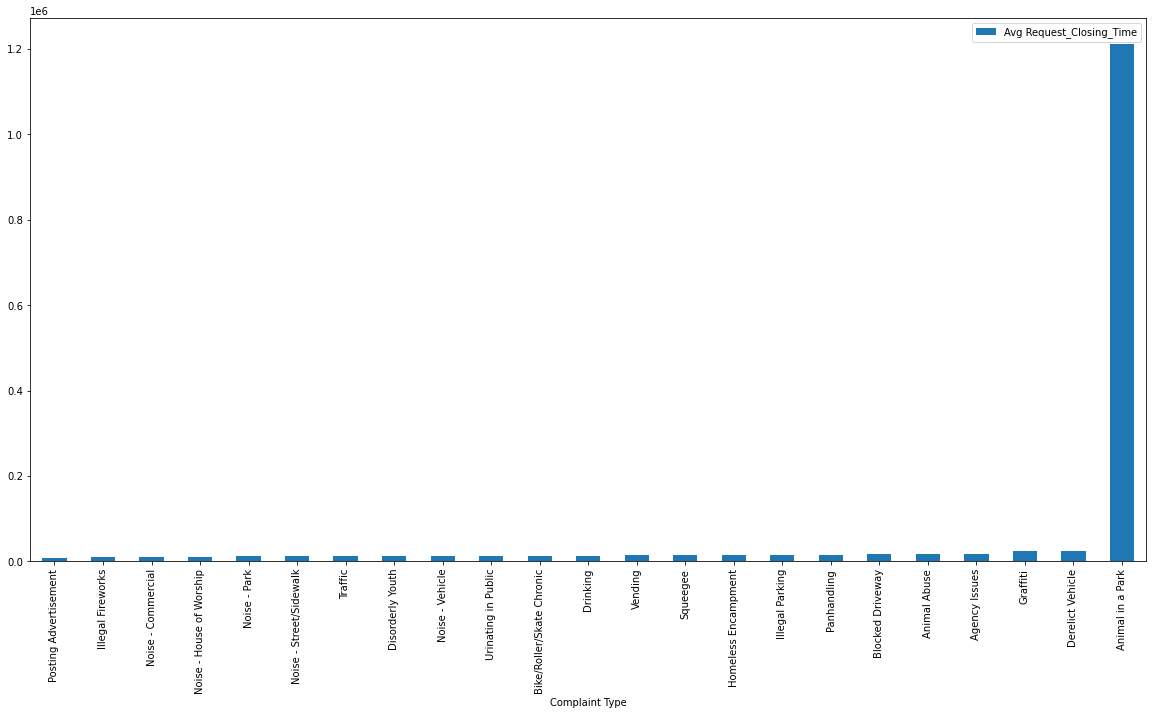

In [93]:
df_ct.plot(x='Complaint Type', y='Avg Request_Closing_Time', kind='bar',figsize=(20,10))

In [94]:
#significant variables by performing statistical analysis using p-values

**Kruskal-Wallis Test**

In [95]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [96]:
#The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.

In [98]:
!pip install pingouin
from pingouin import kruskal

In [141]:
df_ct.columns

Index(['Complaint Type', 'Avg Request_Closing_Time'], dtype='object')

In [142]:
df5=df_ct

In [144]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df5['Complaint Type']= label_encoder.fit_transform(df5['Complaint Type'])

In [145]:
mct=pd.crosstab(df5['Complaint Type'],df5['Avg Request_Closing_Time'])
mct

Avg Request_Closing_Time,7.286256e+03,1.011348e+04,1.108576e+04,1.139109e+04,1.222606e+04,1.223130e+04,1.230912e+04,1.236375e+04,1.256180e+04,1.295929e+04,...,1.456025e+04,1.545138e+04,1.565044e+04,1.585355e+04,1.623252e+04,1.803256e+04,1.828912e+04,2.327634e+04,2.535960e+04,1.212634e+06
Complaint Type,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
kruskal(data=df5,dv='Complaint Type',between='Avg Request_Closing_Time')

,Source,ddof1,H,p-unc
Kruskal,Avg Request_Closing_Time,22,22.0,0.459889


**The Kruskal-Wallis Test uses the following null and alternative hypotheses:**

The null hypothesis (H0): The median is equal across all groups.

The alternative hypothesis: (Ha): The median is not equal across all groups.

In this case, the test statistic is 22 and the corresponding p-value is 0.4598. Since this **p-value is greater than 0.05**, **we can accept the null hypothesis**.